<a href="https://colab.research.google.com/github/sanyam1992000/Geeksman_AISquad_Project1_Sanyam/blob/master/prediction_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***To Do First***

[Folder](https://drive.google.com/drive/folders/1k_w4LQGvxtD7zpu82ChG8LGAw0XNSv6r?usp=sharing)

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [3]:
import os
from fastai.vision import *
from fastai.metrics import error_rate

In [ ]:
!wget -O "export.pkl" "https://drive.google.com/uc?id=1gagDEY69S5wHwl8AbcPFkKtRuWOj3nz1"

In [6]:
predictor = load_learner('/content/drive/My Drive')

In [7]:
def my_predictor(im):
  test_img = open_image(im)
  pred_class,pred_idx,outputs = predictor.predict(test_img)
  return pred_class

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# ***Predict by passing Images Url***

In [18]:
url = input("Enter URL")
!wget -O "sample.jpg" {url}

Enter URLhttps://s3.india.com/wp-content/uploads/2020/08/sushant-dfbk4-2.jpg
--2020-08-26 09:04:37--  https://s3.india.com/wp-content/uploads/2020/08/sushant-dfbk4-2.jpg
Resolving s3.india.com (s3.india.com)... 23.67.120.105, 2600:1402:d800:196::2965, 2600:1402:d800:192::2965
Connecting to s3.india.com (s3.india.com)|23.67.120.105|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35511 (35K) [image/jpeg]
Saving to: ‘sample.jpg’

sample.jpg          100%[===================>]  34.68K  --.-KB/s    in 0.01s   

2020-08-26 09:04:38 (2.70 MB/s) - ‘sample.jpg’ saved [35511/35511]



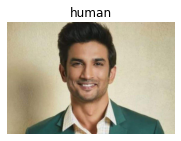

In [19]:
counter = 0
os.makedirs("output",exist_ok=True)
img = open_image('/content/sample.jpg')
title = str(my_predictor('/content/sample.jpg'))
img.show(title=title)
plt.savefig("output/output{}.jpg".format(counter))
counter += 1

# ***Predict by Uploading Images***

In [ ]:
from google.colab import files
my_file = files.upload()

Saving spiderman.jpg to spiderman.jpg
Saving hinata.jpeg to hinata.jpeg
Saving MV5BOTcxOWMzODQtMmZjNS00MmM4LTg1YzQtYzQ3MTAyODQ3ZGE4XkEyXkFqcGdeQXRoaXJkLXBhcnR5LXZpZGVvLXVwZGF0ZXI@._V1_CR0,45,480,270_AL_UX477_CR0,0,477,268_AL_.jpg to MV5BOTcxOWMzODQtMmZjNS00MmM4LTg1YzQtYzQ3MTAyODQ3ZGE4XkEyXkFqcGdeQXRoaXJkLXBhcnR5LXZpZGVvLXVwZGF0ZXI@._V1_CR0,45,480,270_AL_UX477_CR0,0,477,268_AL_.jpg
Saving p-death-note-light.jpg to p-death-note-light.jpg
Saving death-note-L.webp to death-note-L.webp
Saving index.jpeg to index.jpeg
Saving main-qimg-c88afd51814e966679880ed4f9b3d95c.webp to main-qimg-c88afd51814e966679880ed4f9b3d95c.webp
Saving madara to madara
Saving 42043706-beautiful-funky-girl-posing-in-studio-over-yellow-summer-background-wearing-pink-wig-.jpg to 42043706-beautiful-funky-girl-posing-in-studio-over-yellow-summer-background-wearing-pink-wig-.jpg
Saving Funky-Names-For-Baby-Boys-And-Girls.jpg to Funky-Names-For-Baby-Boys-And-Girls.jpg
Saving images.jpeg to images.jpeg
Saving MV5BODI4NDY1N

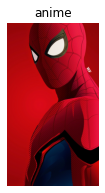

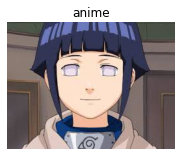

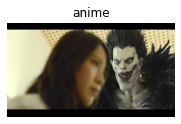

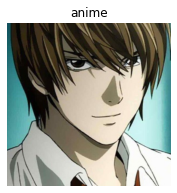

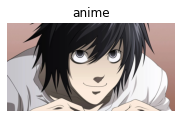

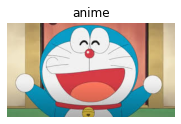

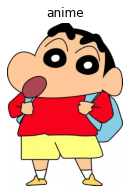

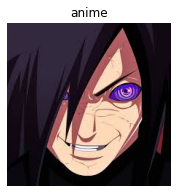

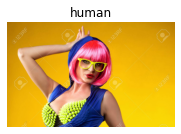

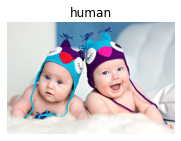

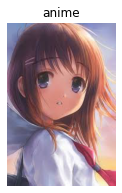

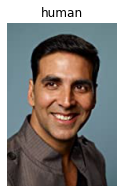

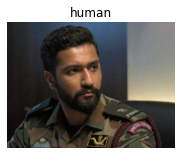

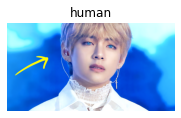

In [ ]:
path = list(my_file.keys())
c = len(path)
os.makedirs("output",exist_ok=True)

counter = 0
for i in path:
  img = open_image(i)
  title = str(my_predictor(i))
  img.show(title=title)
  plt.savefig("output/output{}.jpg".format(counter))
  counter += 1

# ***Predict By Uploading Video***

In [9]:
import cv2, os
os.makedirs("output",exist_ok=True)
  
def FrameCapture(path): 
    vidObj = cv2.VideoCapture(path) 
    count = 0
    success = 1
  
    while success: 
        success, image = vidObj.read() 
        try:
          cv2.imwrite("output/frame%d.jpg" % count, image) 
        except:
          return
        count += 1

In [ ]:
from google.colab import files
my_file = files.upload()

Saving Shino's Face without sunglasses , Naruto funny moment!!-CFDFJkc5YDc.webm to Shino's Face without sunglasses , Naruto funny moment!!-CFDFJkc5YDc.webm


In [10]:
# path = list(my_file.keys())
# os.makedirs("output",exist_ok=True)

path = ['/content/drive/My Drive/VID_20200826_115817.mp4']
for i in path:
  FrameCapture(i)

In [11]:
% time
path = os.listdir('/content/output')
counter = 0
os.makedirs("output",exist_ok=True)
path.sort(key = lambda x: (len(x),x))
path

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 4.77 µs


['frame0.jpg',
 'frame1.jpg',
 'frame2.jpg',
 'frame3.jpg',
 'frame4.jpg',
 'frame5.jpg',
 'frame6.jpg',
 'frame7.jpg',
 'frame8.jpg',
 'frame9.jpg',
 'frame10.jpg',
 'frame11.jpg',
 'frame12.jpg',
 'frame13.jpg',
 'frame14.jpg',
 'frame15.jpg',
 'frame16.jpg',
 'frame17.jpg',
 'frame18.jpg',
 'frame19.jpg',
 'frame20.jpg',
 'frame21.jpg',
 'frame22.jpg',
 'frame23.jpg',
 'frame24.jpg',
 'frame25.jpg',
 'frame26.jpg',
 'frame27.jpg',
 'frame28.jpg',
 'frame29.jpg',
 'frame30.jpg',
 'frame31.jpg',
 'frame32.jpg',
 'frame33.jpg',
 'frame34.jpg',
 'frame35.jpg',
 'frame36.jpg',
 'frame37.jpg',
 'frame38.jpg',
 'frame39.jpg',
 'frame40.jpg',
 'frame41.jpg',
 'frame42.jpg',
 'frame43.jpg']

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.29 µs


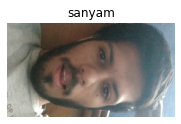

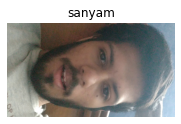

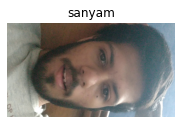

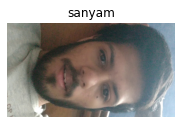

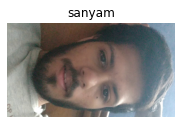

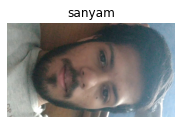

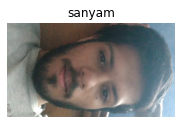

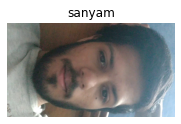

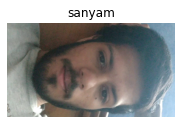

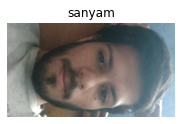

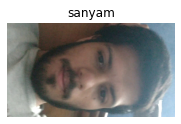

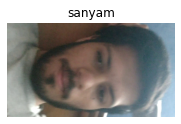

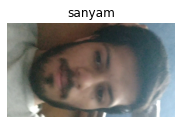

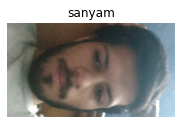

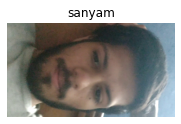

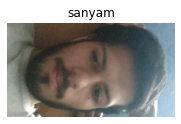

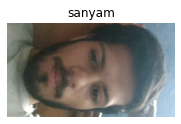

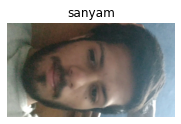

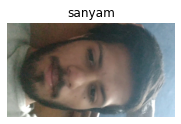

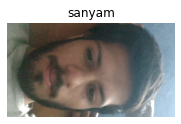

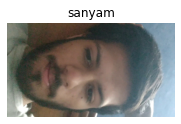

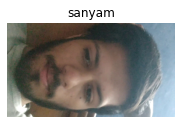

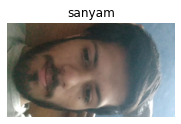

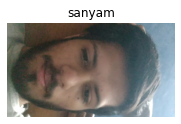

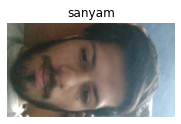

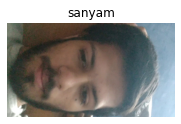

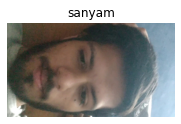

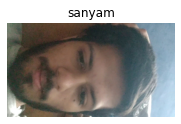

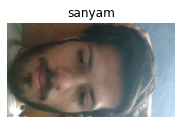

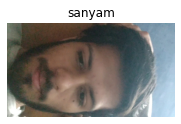

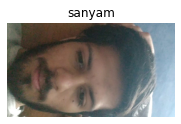

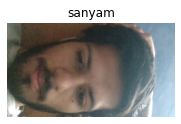

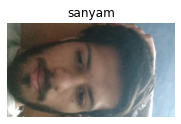

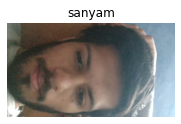

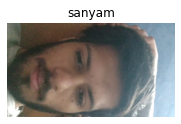

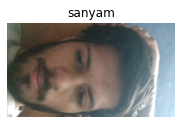

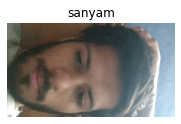

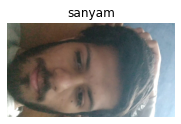

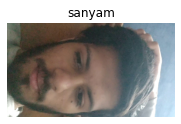

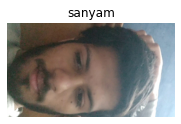

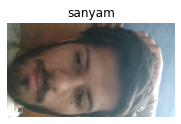

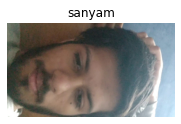

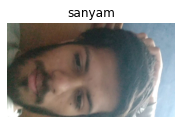

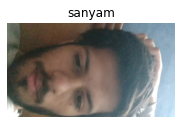

In [12]:
% time

for i in path[:100]:
  img = open_image('/content/output/'+ i)
  title = str(my_predictor('/content/output/'+ i))
  img.show(title=title)
  plt.savefig("output/output{}.jpg".format(counter))
  counter += 1

# ***Output to Video***

In [13]:
%cd "output"
!ffmpeg -framerate 2 -pattern_type glob -i '*.jpg' -s 1920x1080  \-c:v libx264 -r 1 -pix_fmt yuv420p ../anime_vs_human_output.mp4
%cd ..

/content/output
ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libx

In [14]:
!pip install -U kora
from kora.drive import upload_public

In [16]:
url = upload_public('anime_vs_human_output.mp4')
print(url)

https://drive.google.com/uc?id=1pEcXe2whSuKMwZKFE63-ZP7bDZO5vmyp


In [17]:
from IPython.display import HTML
HTML(f"""<video src={url} width=500 controls/>""")